## Problem Statement: 
    SALES PREDICTION
   Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.In businesses that offer products or services, the role of a Data Scientist is crucial for predicting future sales. They utilize machinelearning techniques in Python to analyze and interpret  data, allowing hem to make informed decisions regarding advertising costs. Byleveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential. Let's embark onthe journey of sales prediction using machine learning in Python.

In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Simple Linear Regression

In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
df= pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


check shape and datatypes of features

In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
# so all float datatypes are float

check null value

In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
# no null value present

check outliers

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:title={'center':'Sales'}, xlabel='TV'>

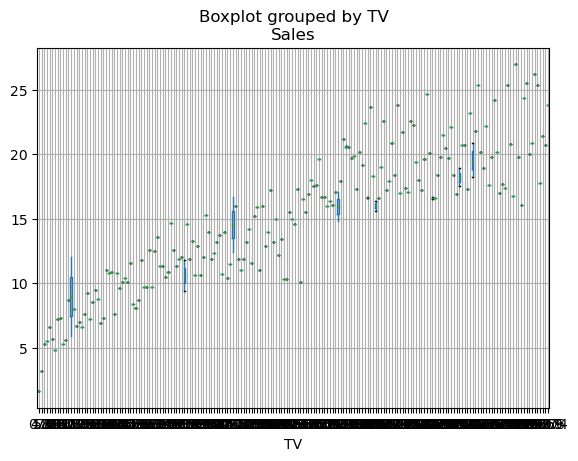

In [14]:
df.boxplot(column='Sales',by = 'TV')

<AxesSubplot:title={'center':'Sales'}, xlabel='Radio'>

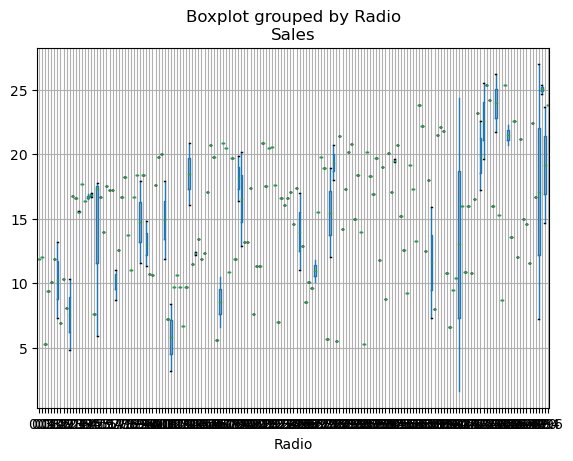

In [16]:
df.boxplot(column='Sales',by = 'Radio')

<AxesSubplot:title={'center':'Sales'}, xlabel='Newspaper'>

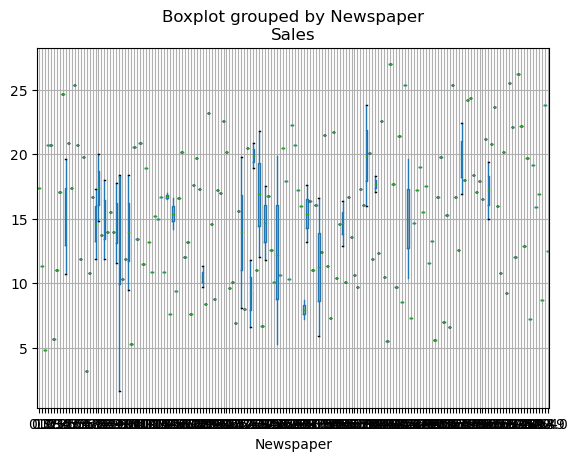

In [17]:
df.boxplot(column='Sales',by = 'Newspaper')

<AxesSubplot:xlabel='TV', ylabel='Count'>

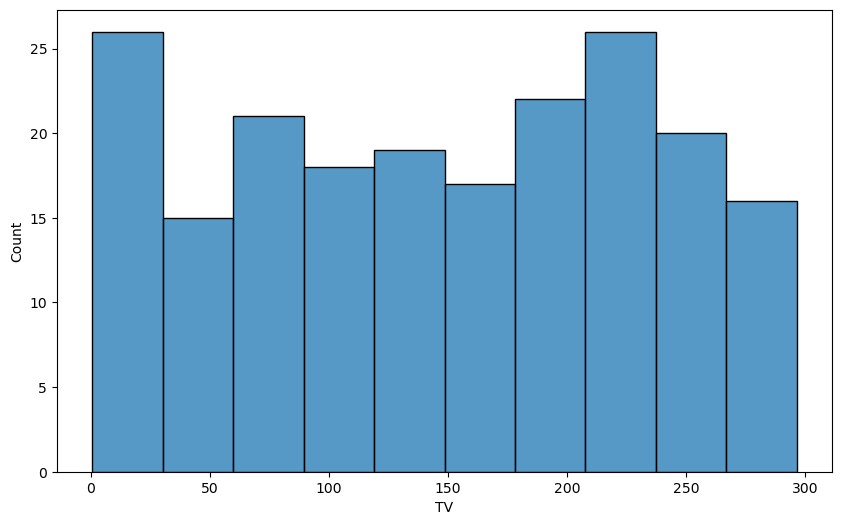

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x ='TV',bins = 10)

<AxesSubplot:xlabel='Radio', ylabel='Count'>

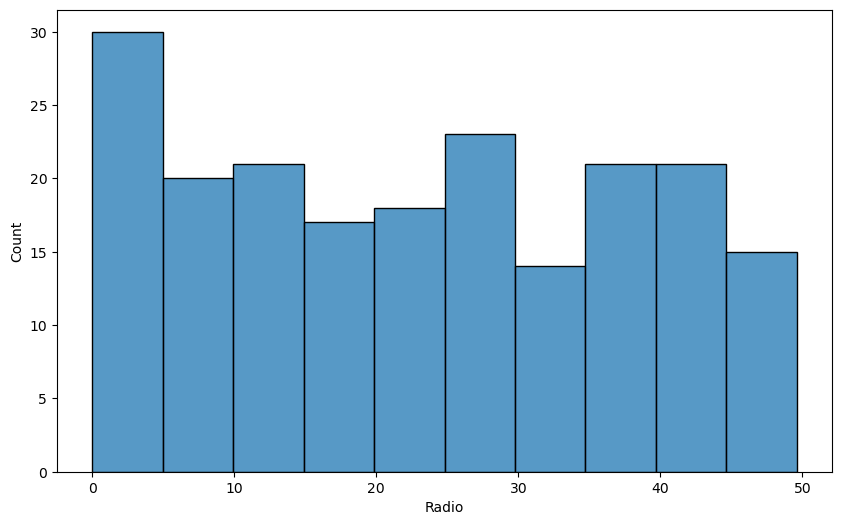

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x ='Radio',bins = 10)

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

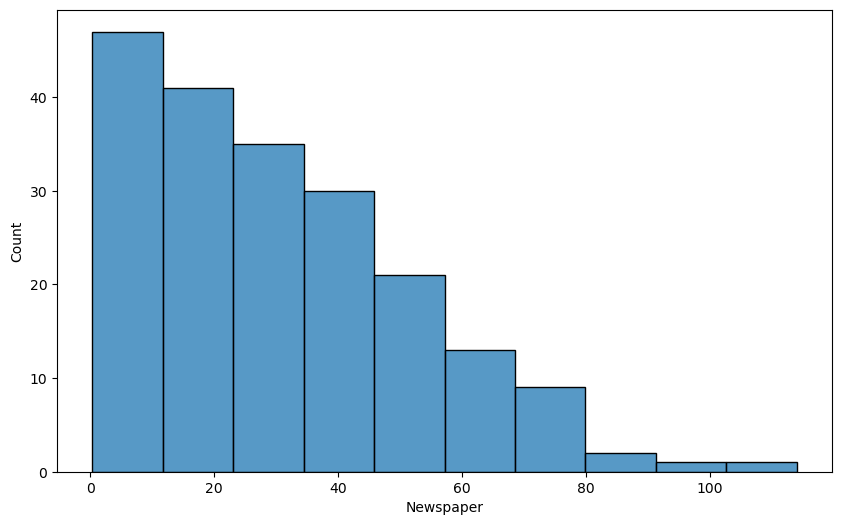

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x ='Newspaper',bins = 10)

(array([  1.,   1.,   1.,   7.,  10.,  18.,  46.,  80.,  84., 116., 150.,
        142., 120.,  87.,  63.,  33.,  18.,  16.,   5.,   2.]),
 array([-3.75858082, -3.41083355, -3.06308627, -2.71533899, -2.36759171,
        -2.01984443, -1.67209716, -1.32434988, -0.9766026 , -0.62885532,
        -0.28110805,  0.06663923,  0.41438651,  0.76213379,  1.10988106,
         1.45762834,  1.80537562,  2.1531229 ,  2.50087017,  2.84861745,
         3.19636473]),
 <BarContainer object of 20 artists>)

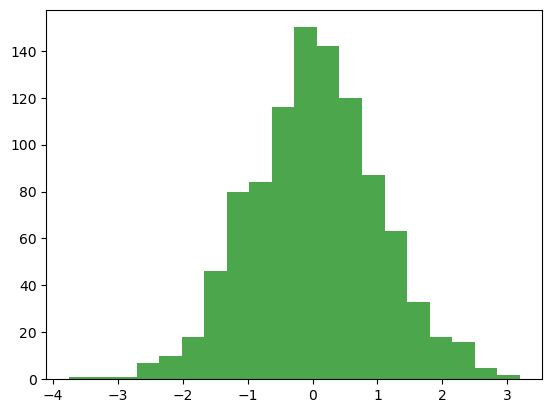

In [21]:
data = np.random.randn(1000)  
plt.hist(data, bins=20, color='green', alpha=0.7)

<AxesSubplot:>

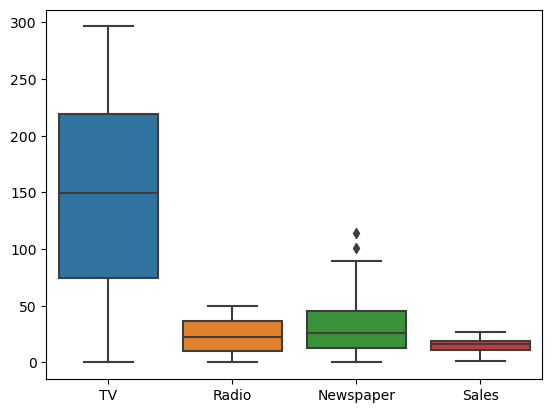

In [22]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

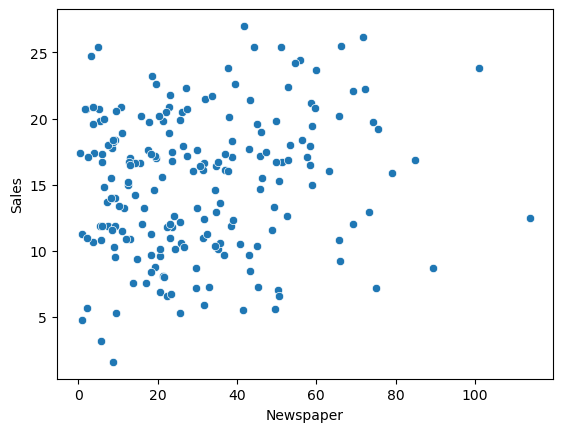

In [23]:
sns.scatterplot(x = 'Newspaper',y = 'Sales',data = df)

In [24]:
# we analys above table and found 'Newspaper' featurs std curve is 
# skewed curve so outliers present in this two featurs

Remove Outliers

In [25]:
upper_limit = df.Newspaper.mean() + 3*df.Newspaper.std()
lower_limit = df.Newspaper.mean() - 3*df.Newspaper.std()

In [26]:
# show outliers rows

df[(df.Newspaper > upper_limit) | (df.Newspaper < lower_limit)]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [27]:
# remove rows which outliers is present

df2 = df[~(df.Newspaper > upper_limit) | (df.Newspaper < lower_limit)]

In [28]:
df2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:>

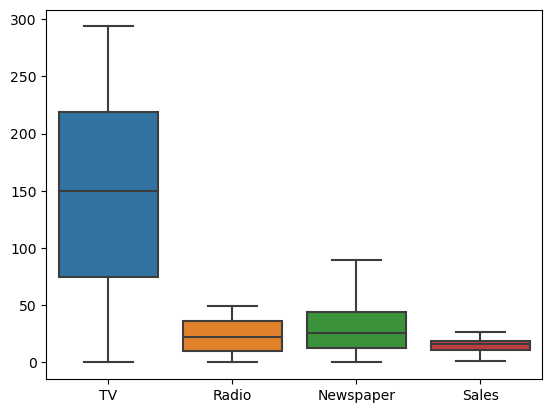

In [29]:
sns.boxplot(data=df2)

In [30]:
# so in df2 dataframe no outliers presents

Check All Features relation with Sales feature

<AxesSubplot:xlabel='TV', ylabel='Sales'>

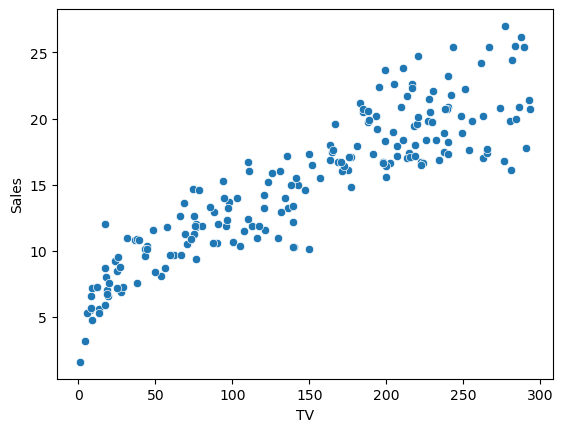

In [31]:
sns.scatterplot(x = 'TV',y = 'Sales', data = df2)

In [32]:
# this is Highly Positive relation

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

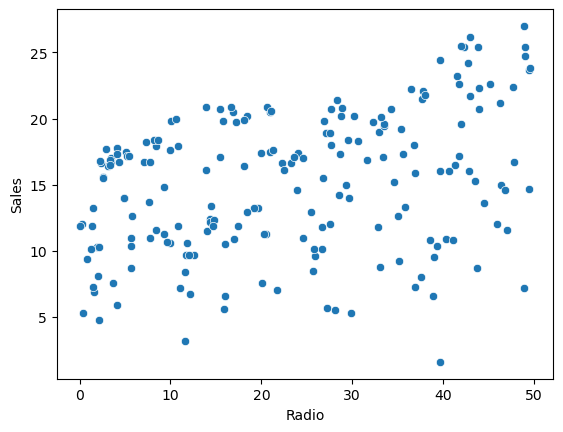

In [33]:
sns.scatterplot(x = 'Radio',y = 'Sales', data = df2)

In [34]:
# this is polynomial relation

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

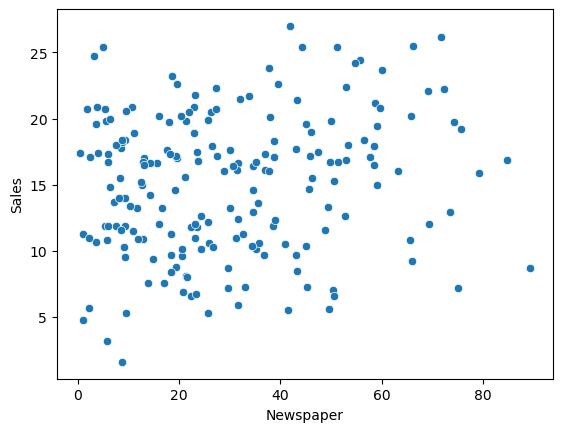

In [35]:
sns.scatterplot(x = 'Newspaper',y = 'Sales', data = df2)

In [36]:
# this is polynomial relation

Feature selection

<AxesSubplot:>

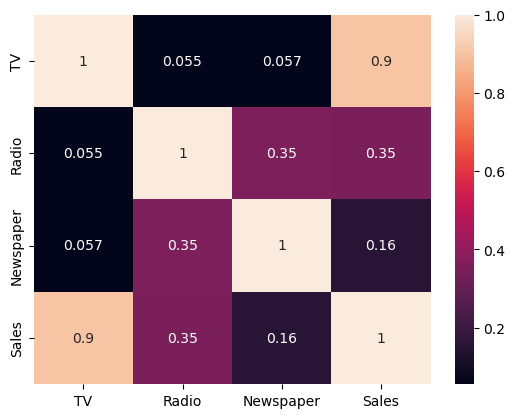

In [37]:
# we are use HeatMap and pearson corelation factor for featur selection

sns.heatmap(df.corr(),annot= True)

In [38]:
# so we study above matrix and we analyse all feature are important for
# price prediction

In [39]:
x = df2.drop('Sales',axis = 1)
y = df2['Sales']

In [40]:
# split data for training and testing perpose

from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=5)
x_train.shape,x_test.shape, y_train.shape,y_test.shape 

((148, 3), (50, 3), (148,), (50,))

model training

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

testing data

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [45]:
y_pred = lin_model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)  
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_test,y_pred)
print(f"MAE = {mae}")

r2 = r2_score(y_test,y_pred)
print(f"R-squre value = {r2}")
    

MSE = 2.7498050755460777
RMSE = 1.6582536222020072
MAE = 1.2544246350604447
R-squre value = 0.8963942384652963


training data

In [46]:
y_pred_train = lin_model.predict(x_train)

print("Training data metrx")

mse = mean_squared_error(y_train,y_pred_train) 
print(f"MSE = {mse}")
print(f"RMSE = {np.sqrt(mse)}")

mae = mean_absolute_error(y_train,y_pred_train)
print(f"MAE = {mae}")

r2 = r2_score(y_train,y_pred_train)
print(f"R-squre value = {r2}")

Training data metrx
MSE = 2.7587674989639384
RMSE = 1.6609537919412263
MAE = 1.2567499166807055
R-squre value = 0.8976508139914867


conclusion

In [47]:
# So in TRAINING TIME our model accuracy is 90% and TESTING time our
#model accuracy is 89%

USER TEST fuction:

In [48]:
x_train.head(1).T

,125
TV,87.2
Radio,11.8
Newspaper,25.9


In [49]:
TV = 87.2
Radio = 11.8
Newspaper = 25.9

In [50]:
# column_list:
import numpy as np

array = np.array([TV,Radio,Newspaper],ndmin = 2)

In [51]:
Sales = lin_model.predict(array)
print("Sales :",Sales)

Sales : [10.87368312]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [52]:
# compaire real value and predict value

df2[df2['TV'] ==87.2]

,TV,Radio,Newspaper,Sales
125,87.2,11.8,25.9,10.6


In [53]:
# real value 10.6 and predicted value 10.87

<AxesSubplot:xlabel='Sales'>

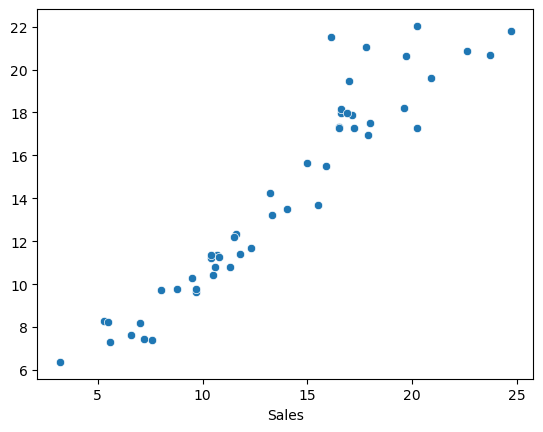

In [54]:
# check relation between actual values and predict value
sns.scatterplot(x = y_test,y= y_pred)

Overall Test Result OR OLS (Ordinary Least Squares) Result

In [55]:
import statsmodels.api as sm

x = df2[['TV','Radio','Newspaper']]
y = df2['Sales']
x2 = sm.add_constant(x)
temp = sm.OLS(y,x2)
est = temp.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     590.4
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           3.02e-97
Time:                        07:23:41   Log-Likelihood:                -380.34
No. Observations:                 198   AIC:                             768.7
Df Residuals:                     194   BIC:                             781.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6002      0.314     14.673      0.0

# Conclusion

#### The process of sales prediction encompasses the intricate task of estimating product demand, considering multifaceted elements like advertising expenditure, audience segmentation, and choice of advertising platforms. Within the realm of businesses offering products.
#### The invaluable insights derived from these predictions empower businesses to refine and optimize their advertising strategies, ultimately unlocking the full potential of sales. As we embark on the journey of sales prediction through machine learning in Python, the doors open to a realm of enhanced decision-making and heightened sales efficiency.